#### Getting Started
We will be using TensorFlow and  Keras for data augmentation and matplotlib for displaying the images.

In [1]:
from glob import glob
import pandas as pd
import cv2
from scripts.visualization import Visualization
import matplotlib.pyplot as plt
import numpy as np

#### Reading Data

In [2]:
# Path to all data
data_dir = './lgg-mri-segmentation/kaggle_3m'

# img size
IMG_SIZE = 512

In [3]:
images_paths = []
masks_paths = glob(f'{data_dir}/*/*_mask*')

for i in masks_paths:
    images_paths.append(i.replace('_mask', ''))

df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
df.head()

,images_paths,masks_paths
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...


In [4]:
def pos_neg_diagnosis(masks_paths):
    value = np.max(cv2.imread(masks_paths))
    if value > 0 :
        return 1
    else:
        return 0

df['label'] = df['masks_paths'].apply(lambda x: pos_neg_diagnosis(x))
df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
...,...,...,...
3924,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3925,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3926,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3927,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0


#### Data Distribution

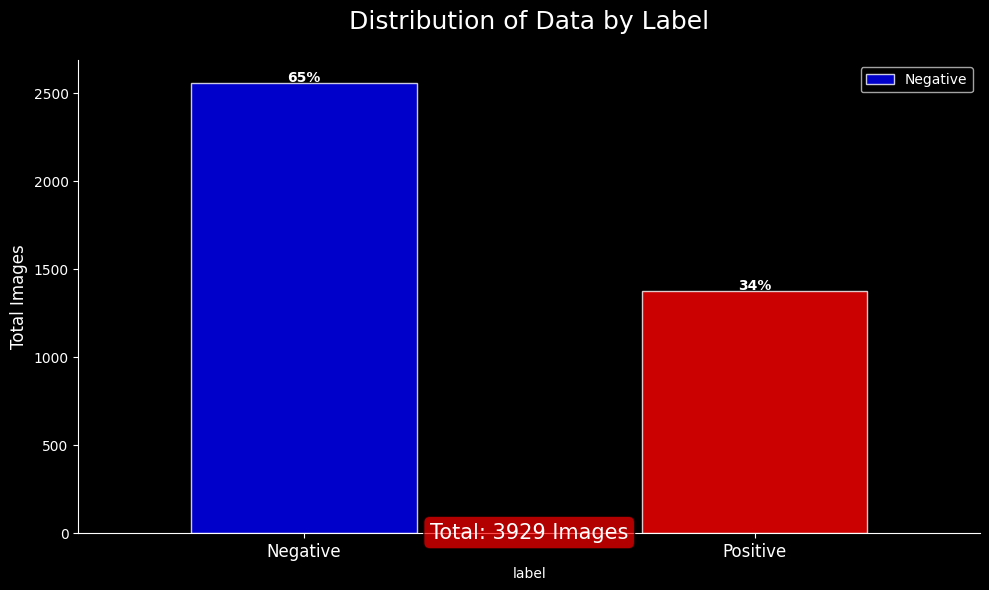

In [5]:
visualization = Visualization(df)
visualization.plot_distribution_grouped_by_label()

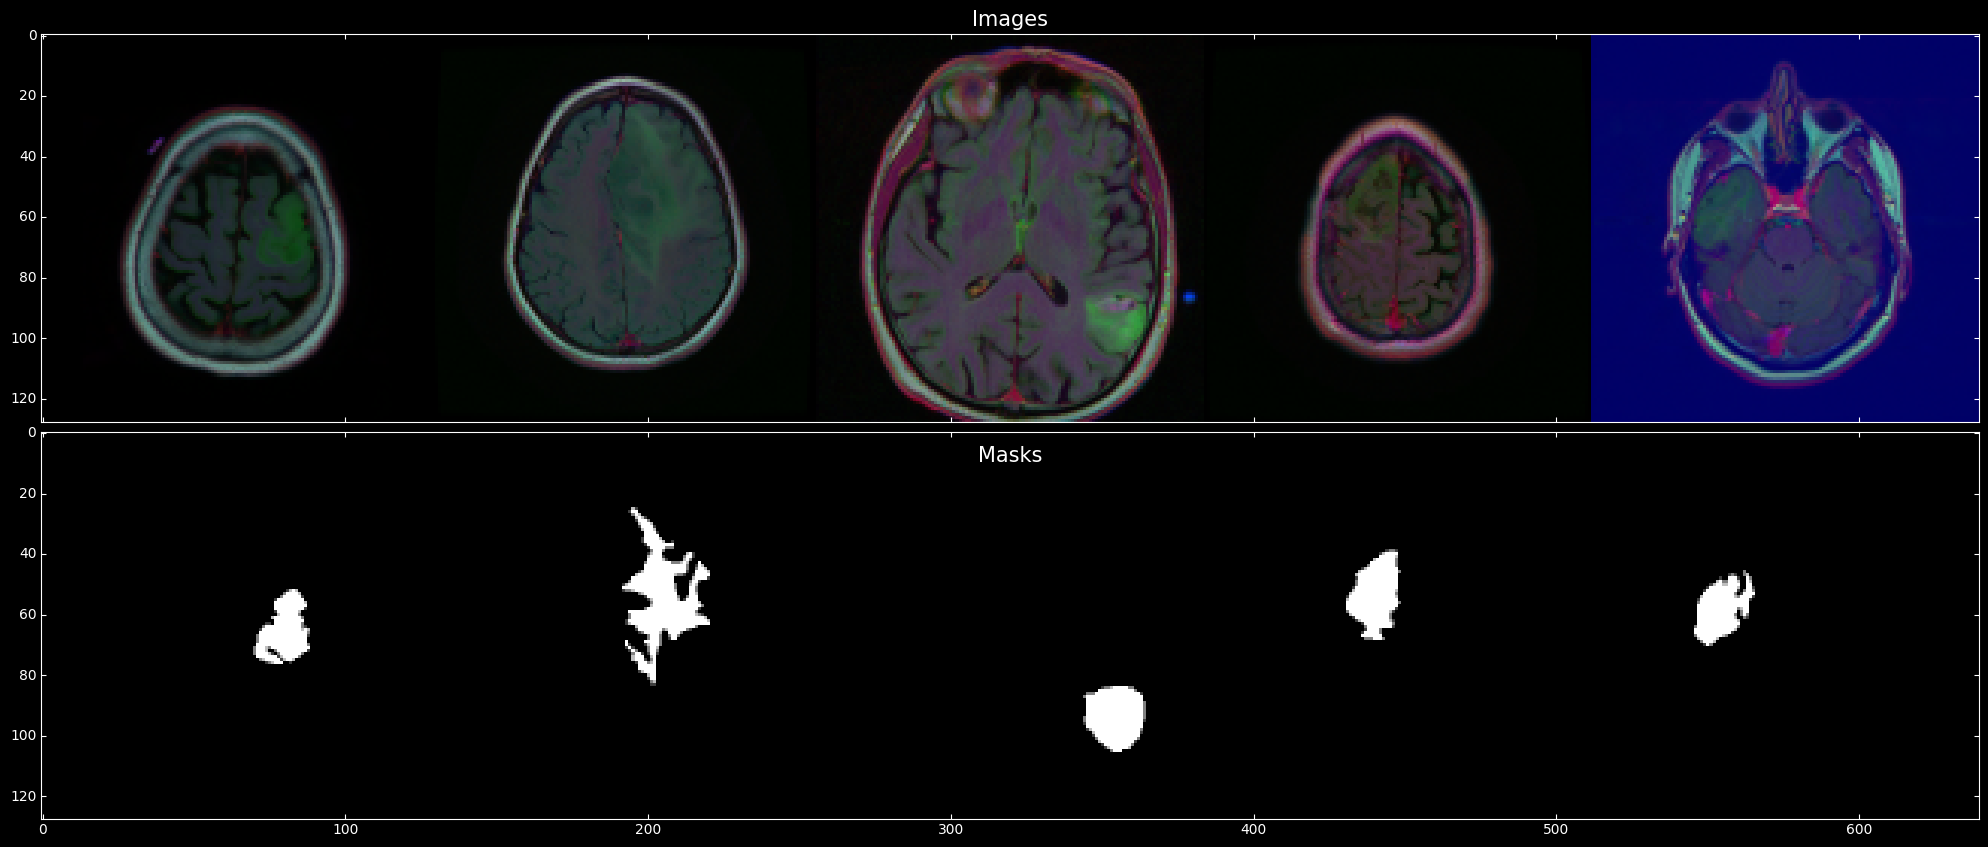

In [6]:
visualization = Visualization(df)
visualization.plot_images_and_masks()

#### Data Loading

In the code below, we have loaded 80% training, 10% validation, and a 10% test set with labels and metadata.

In [7]:
mask_df = df[df['label'] == 1]
mask_df.shape

(1373, 3)

In [8]:
from sklearn.model_selection import train_test_split
# Split df into train_df and val_df
train_df, val_df = train_test_split(mask_df, stratify=mask_df.label, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
val_df, test_df = train_test_split(val_df, stratify=val_df.label, test_size=0.3)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (1235, 3) 
Val: (96, 3) 
Test: (42, 3)


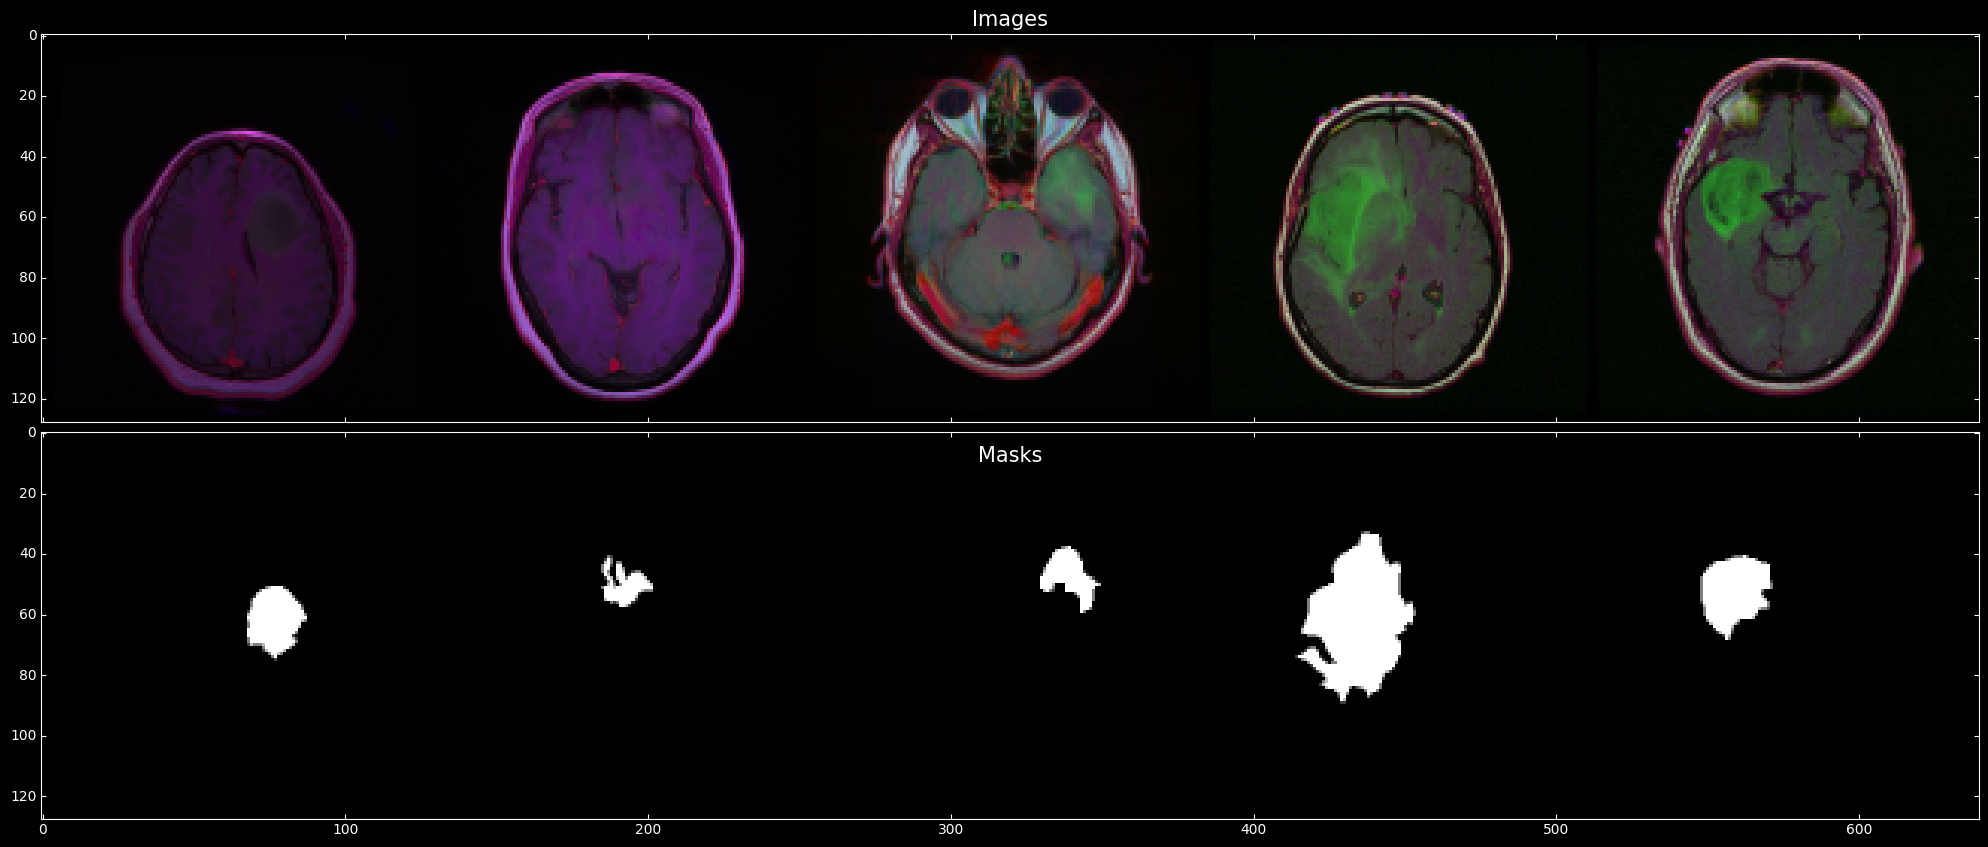

In [9]:
visualization = Visualization(train_df)
visualization.plot_images_and_masks()

#### GAN

In [10]:
train_df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8167_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8167_...,1
1,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_A616_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_A616_...,1
2,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7300_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7300_...,1
3,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7874_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7874_...,1
4,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MT_...,1
...,...,...,...
1230,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_...,1
1231,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7882_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7882_...,1
1232,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7605_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7605_...,1
1233,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6666_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6666_...,1


In [11]:
from scripts.brain_mri_dataset import BrainMriDataset
from torch.utils.data import DataLoader
IMG_SIZE = 128
BATCH_SIZE = 512

# train
train_dataset = BrainMriDataset(df=train_df, img_size=IMG_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, img_size=IMG_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, img_size=IMG_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [12]:
images, masks, labels = next(iter(train_dataloader))

In [13]:
print(images.shape, masks.shape)

torch.Size([512, 128, 128, 3]) torch.Size([512, 128, 128, 3])


In [14]:
print(images[0].shape, masks[0].shape)

torch.Size([128, 128, 3]) torch.Size([128, 128, 3])


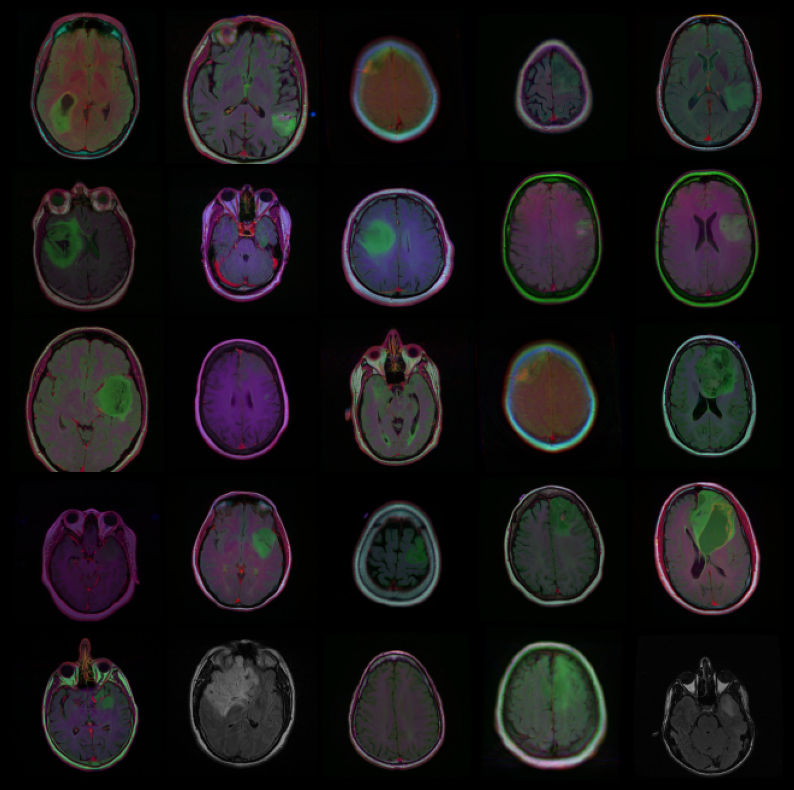

In [15]:
visualization = Visualization(train_df)
visualization.plot_images(images)

In [16]:
from scripts.gan import SimpleGAN

# Instantiate and train the GAN
gan = SimpleGAN(img_size=IMG_SIZE)

Metal device set to: Apple M1 Pro
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Hidden-Layer-  (None, 64, 64, 64)       3136      
 1 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 64, 64, 64)       0         
 Activation-1 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidden-Layer-  (None, 32, 32, 128)      131200    
 2 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 32, 32, 128)      0         
 Activation-2 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidd

In [17]:
gan.train(images, epochs=500, batch_size=128)

1/4 [======>.......................] - ETA: 0s

2023-09-08 13:04:59.307142: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 211ms/step
0/500 [D loss: 0.7081, acc.: 12.50%] [G loss: 0.6929]
Models and loss histories saved.
4/4 [==============================] - 1s 220ms/step
100/500 [D loss: 0.5447, acc.: 81.25%] [G loss: 1.5711]
Models and loss histories saved.
4/4 [==============================] - 1s 218ms/step


4/4 [==============================] - 1s 220ms/step
200/500 [D loss: 0.4914, acc.: 81.64%] [G loss: 4.1466]
Models and loss histories saved.
4/4 [==============================] - 1s 225ms/step


4/4 [==============================] - 1s 216ms/step
300/500 [D loss: 0.2992, acc.: 92.19%] [G loss: 2.9937]
Models and loss histories saved.
4/4 [==============================] - 1s 225ms/step
400/500 [D loss: 0.4178, acc.: 83.20%] [G loss: 3.6801]
Models and loss histories saved.
4/4 [==============================] - 1s 215ms/step


4/4 [==============================] - 1s 225ms/step
Models and loss histories saved.


In [18]:
# Generate synthetic images
num_images = 1700
generated_images = gan.generate_images(num_images)

54/54 [==============================] - 12s 217ms/step


In [19]:
def display_images(images):
    fig, axs = plt.subplots(4,4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow((images[count] * 0.5) + 0.5)
            axs[i, j].axis('off')
            count += 1
    plt.show()

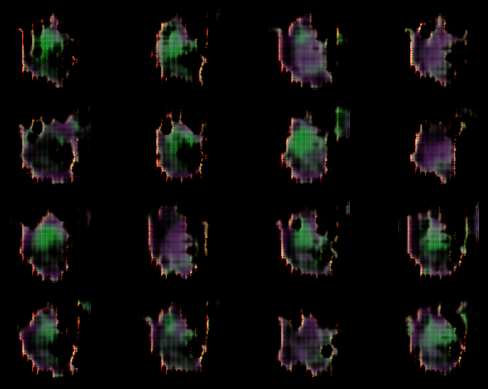

In [20]:
# Display the generated images
display_images(generated_images)

In [21]:
print(generated_images.shape)

(1700, 128, 128, 3)


In [22]:
test_images, test_masks, test_labels = next(iter(test_dataloader))

# Model evaluation

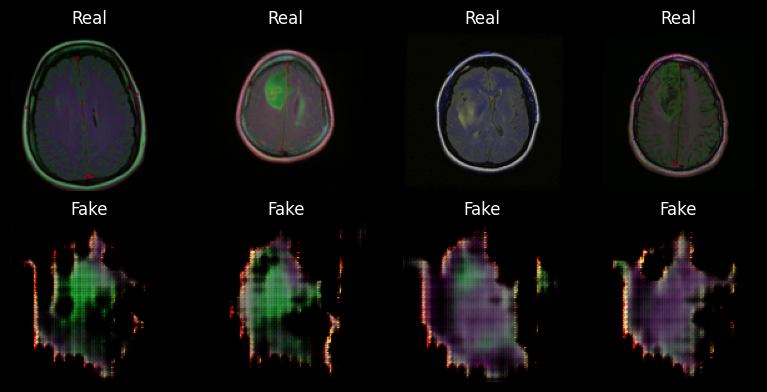

In [23]:
gan.plot_real_vs_fake(test_images, 1000, 4)

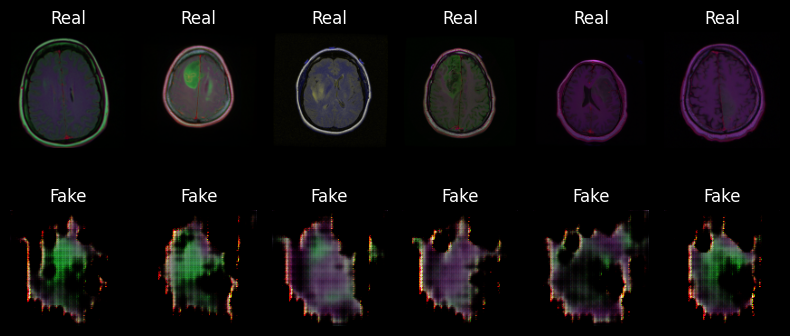

In [24]:
gan.plot_real_vs_fake(test_images, 1000, 6)

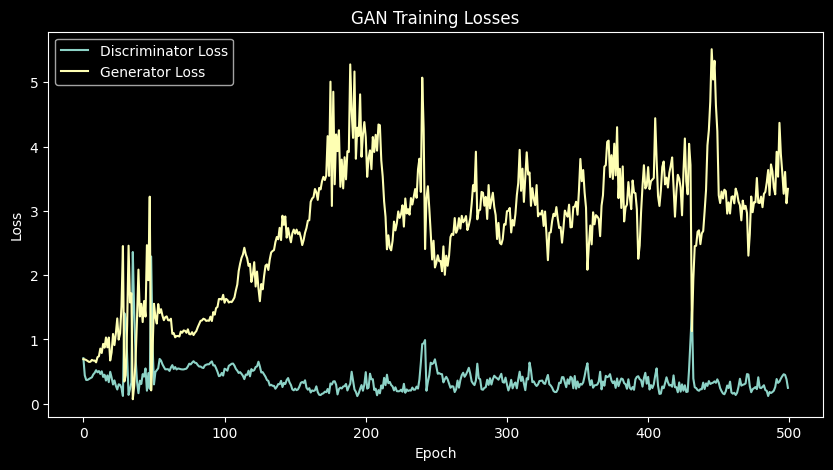

In [25]:
gan.plot_losses()

# Brain Cancer Classifier

#### The fundamental idea underlying this classifier involves a two-step training process. Initially, the model is trained using authentic data, followed by a subsequent training round where both authentic and synthetic data are used. This approach aims to assess whether the classifier's performance exhibits improvement after incorporating synthetic data alongside genuine data.

In [26]:
from scripts.brain_cancer_classifier import BrainCancerClassifier

In [27]:
classifier = BrainCancerClassifier(cl_type='real_data_classifier')

#### Based on real images

In [28]:
all_data = df

In [29]:
# Split df into train_df and val_df
all_train_df, all_val_df = train_test_split(all_data, stratify=all_data.label, test_size=0.1)
all_train_df = all_train_df.reset_index(drop=True)
all_val_df = all_val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
all_val_df, all_test_df = train_test_split(all_val_df, stratify=all_val_df.label, test_size=0.3)
all_val_df = all_val_df.reset_index(drop=True)
all_test_df = all_test_df.reset_index(drop=True)

print(f"Train: {all_train_df.shape} \nVal: {all_val_df.shape} \nTest: {all_test_df.shape}")

Train: (3536, 3) 
Val: (275, 3) 
Test: (118, 3)


In [30]:
IMG_SIZE = 64
BATCH_SIZE = 128

# train
all_train_dataset = BrainMriDataset(df=all_train_df, img_size=IMG_SIZE)
all_train_dataloader = DataLoader(all_train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
all_val_dataset = BrainMriDataset(df=all_val_df, img_size=IMG_SIZE)
all_val_dataloader = DataLoader(all_val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
all_test_dataset = BrainMriDataset(df=all_test_df, img_size=IMG_SIZE)
all_test_dataloader = DataLoader(all_test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [31]:
train_images = []
train_labels = []

for batch in all_train_dataloader:
    images, _, labels = batch
    train_images.append(images.numpy())   
    train_labels.append(labels.numpy())  

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

In [32]:
val_images = []
val_labels = []

for batch in val_dataloader:
    images, _, labels = batch
    val_images.append(images.numpy())  
    val_labels.append(labels.numpy())   

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

In [33]:
# Find the indices of all 1 values
indices_ones = np.where(train_labels == 1)[0]

# Calculate the number of 1 values to remove (half of the count)
num_ones_to_remove = len(indices_ones) // 6

# Randomly shuffle the indices of 1 values
np.random.shuffle(indices_ones)

# Get the indices to keep (the first half after shuffling)
indices_to_keep = indices_ones[:num_ones_to_remove]

# Remove the selected 1 values and corresponding images
train_labels = np.delete(train_labels, indices_to_keep)
train_images = np.delete(train_images, indices_to_keep, axis=0)

In [34]:
print(np.sum(train_labels == 0))

2300


In [35]:
print(np.sum(train_labels == 1))

1030


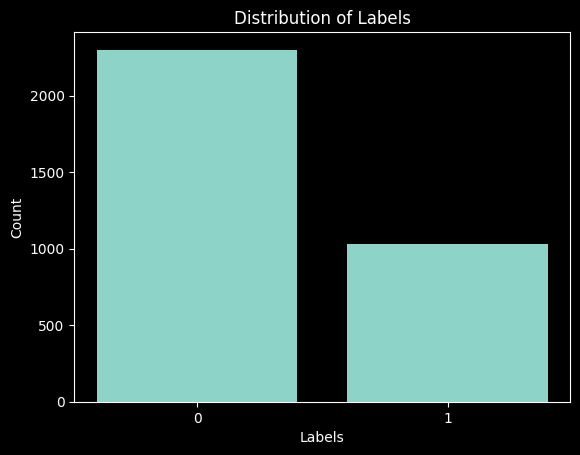

In [36]:
visualization.plot_labels(train_labels)

In [37]:
classifier.train(train_images, train_labels, val_images, val_labels)

Epoch 1/100
105/105 [==============================] - ETA: 0s - loss: 0.5147 - accuracy: 0.7276

ValueError: in user code:

    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/engine/training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/andreasntoules/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 128, 128, 3)


In [ ]:
classifier.plot_training_history()

In [ ]:
# For test DataLoader
all_test_images = []
all_test_labels = []

for batch in all_test_dataloader:
    images, _, labels = batch
    all_test_images.append(images.numpy())  
    all_test_labels.append(labels.numpy())   

test_images = np.concatenate(all_test_images)
test_labels = np.concatenate(all_test_labels)

In [ ]:
classifier.evaluate(test_images, test_labels)

In [ ]:
from scripts.brain_mri_dataset import CombinedBrainMriDataset

In [ ]:
print(np.sum(train_labels == 1))

In [ ]:
print(np.sum(train_labels == 0))

In [ ]:
print(len(generated_images))

In [ ]:
#add generated data to the test data
balanced_train_images = []
balanced_train_labels = []
balanced_train_images = np.concatenate((train_images, generated_images), axis=0) 
balanced_train_labels = np.concatenate((train_labels, np.ones(len(generated_images))), axis=0)

In [ ]:
print(np.sum(balanced_train_labels == 1))

In [ ]:
print(np.sum(balanced_train_labels == 0))

In [ ]:
visualization.plot_labels(balanced_train_labels)

#### Based on real and fake images

In [ ]:
classifier_with_fake_data = BrainCancerClassifier()

In [ ]:
classifier_with_fake_data.train(balanced_train_images, balanced_train_labels, val_images, val_labels)

In [ ]:
classifier_with_fake_data.plot_training_history()

In [ ]:
classifier_with_fake_data.evaluate(test_images, test_labels)